<a href="https://colab.research.google.com/github/KimTaesuk11/Downloads/blob/main/Section1%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
myfile = files.upload()

Saving vgames2-1.csv to vgames2-1.csv


In [72]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(myfile['vgames2-1.csv']))
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [73]:
#df['Year'] = df['Year'].astype(str)
#x = df['Year']
#r = ['0','1','2','3','4','5','6','7','8','9']
#for item in x:
#df['Year'] = item.replace(, "orange")
df
df = df.fillna(0)

In [74]:
df['NA_Sales'] = df['NA_Sales'].replace({'K': '*1e3', 'M': ''}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'K': '*1e3', 'M': ''}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'K': '*1e3', 'M': ''}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'K': '*1e3', 'M': ''}, regex=True).map(pd.eval).astype(float)

In [75]:
import numpy as np
import datetime

#df.iloc[9276]

df['Year'] = (pd.to_datetime(df['Year'], format='%y', errors='coerce').dt.year
                    .fillna(df['Year']))
df['Year'] = df['Year'].apply(np.int64)
#df = df.astype({'NA_Sales': np.float, 'EU_Sales': np.float, 'JP_Sales': np.float, 'Other_Sales': np.float})

In [76]:
#1번 지역에 따라서 선호하는 게임 장르가 다를까
#df.describe()

#num_Platform = df['Platform'].unique() # Year, Genre, Publisher
#print(len(num_Platform))
#num_Platform

df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
#df = df.drop([df.columns[0]], axis='columns') #첫번째 열 제거 코드
df
#import matplotlib.pyplot as plt

#NA = df['NA_Sales'].groupby(df['Genre']).mean() #북미
#EU = df['EU_Sales'].groupby(df['Genre']).mean() #유럽
#JP = df['JP_Sales'].groupby(df['Genre']).mean() #일본
#Other = df['Other_Sales'].groupby(df['Genre']).mean() #기타

#NA = df['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

#result3 = pd.concat([NA,EU,JP,Other],axis=1)
#result3.reset_index()
#result3 = result3.drop([0])
#result3

#plt.bar(result3)
#plt.title('Sum of Tips by Day', fontsize=20)
#plt.xlabel('Day', fontsize=18)
#plt.ylabel('Sum of Tips', fontsize=18)
#plt.xticks(index, label, fontsize=15)
#plt.show()
#normalization_r3 = (result3 - result3.mean())/result3.std()
#normalization_r3
#n1
#print(NA.mean())
#print(EU.mean())
#print(JP.mean())
#print(Other.mean())


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [77]:
#1번 지역에 따라서 선호하는 게임 장르가 다를까

import seaborn as sns
import matplotlib.pyplot as plt

df_genre = df.groupby(by=['Genre'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 장르
df_genre = df_genre.reset_index()

df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum() # 북미 선호하는 게임 장르
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum() # 유럽 선호하는 게임 장르
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_ot = df_genre_ot.reset_index()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre = df_genre.set_index("Genre")

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df_genre[:] = scaler.fit_transform(df_genre[:])
df_genre = df_genre.drop(index=0, axis=0)
df_genre

,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,4380517.78,1170156.73,7030867.78,910185.54,13491727.83
Adventure,140063.91,60051.89,270105.39,80016.73,550237.92
Fighting,1390099.83,180087.16,810222.39,140036.50,2520445.88
Misc,2140210.22,230105.04,3760404.29,130073.91,6260793.46
Platform,1290200.32,210130.44,3310443.13,380051.15,5190825.04
Puzzle,50050.68,56.87,420122.93,12.52,470243.00
Racing,630236.47,260056.14,5490351.70,340076.76,6720721.07
Role-Playing,30183.55,3830341.12,1210318.33,730056.23,5800899.23
Shooter,3340309.71,40038.24,2710579.21,340102.31,6431029.47


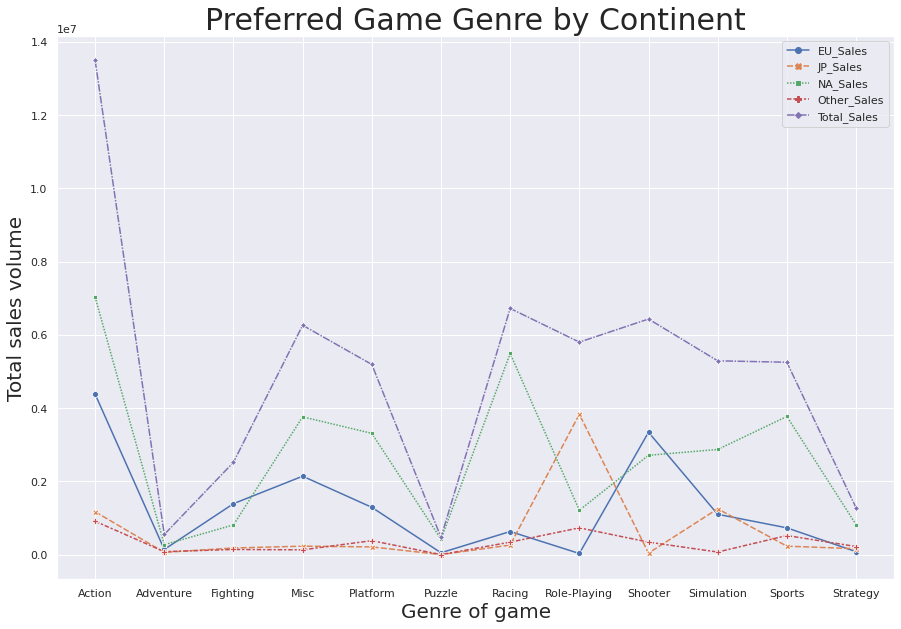

In [78]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("Preferred Game Genre by Continent", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

sns.lineplot(data=df_genre, markers=True);
# EU 는 Fighting, Shooter, JP는 Role-Playing, NA는 Misc, Platform, Racing, Sport 등에서 선호도를 나타내었다.

In [79]:
#2번 연도별 게임의 트렌드가 있을까
year_sale_dx = df.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
genre = year_sale_max['Genre']
year_sale_max['Total_Sales'] = year_sale_max['Total_Sales'].round(2)

#year_sale_max['new'] = year_sale_max['Year'] + ' - ' + year_sale_max['Total_Sales']
#year_sale_max['Year'] = year_sale_max['Year'].astype(str)
#year_sale_max['Total_Sales'] = year_sale_max['Total_Sales'].astype(str)
year_sale_max.tail(7)

,Year,Genre,Total_Sales
33,2012,Action,3150117.66
34,2013,0,5170009.18
35,2014,Shooter,660065.33
36,2015,Role-Playing,610035.82
37,2016,Role-Playing,30006.72
38,2017,Role-Playing,0.04
39,2020,Simulation,0.29


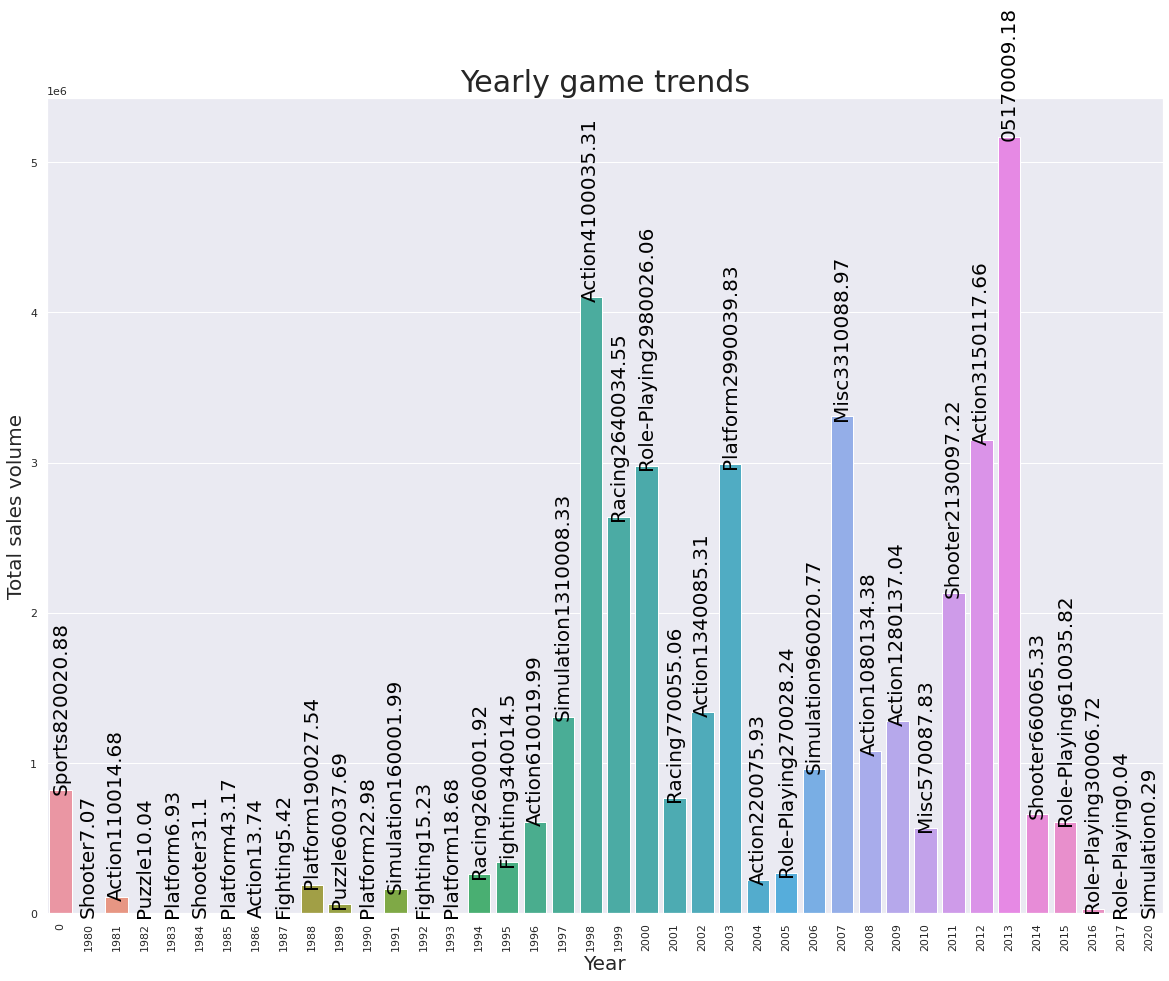

In [80]:
plt.figure(figsize=(20, 15))
g = sns.barplot(x='Year', y='Total_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Total_Sales']:
    g.text(index, value + 1, str(genre[index]) + str(round(value, 2)), color='#000', size=20, rotation= 90, ha="center")
#    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
#    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.title("Yearly game trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

plt.xticks(rotation=90)
plt.show()

In [81]:
# 3번 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
sortdf = df.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = sortdf.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Total_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = top_game_sale.reset_index(drop=True)
top_game_sale

,Name,Year,Genre,Total_Sales
0,Pokemon X/Pokemon Y,2013,0,5170009.18
1,The Legend of Zelda: Ocarina of Time,1998,Action,4100003.50
2,Super Mario Bros. 3,2003,Platform,2930002.28
3,Final Fantasy IX,2000,Role-Playing,2780002.53
4,Crash Team Racing,1999,Racing,2570002.22
5,Assassin's Creed III,2012,Action,2560003.94
6,Battlefield 3,2011,Shooter,2130005.21
7,Guitar Hero II,2007,Misc,2010000.19
8,Call of Duty: Ghosts,2013,Shooter,1780001.85
9,Cooking Mama 2: Dinner With Friends,2007,Simulation,1610001.99


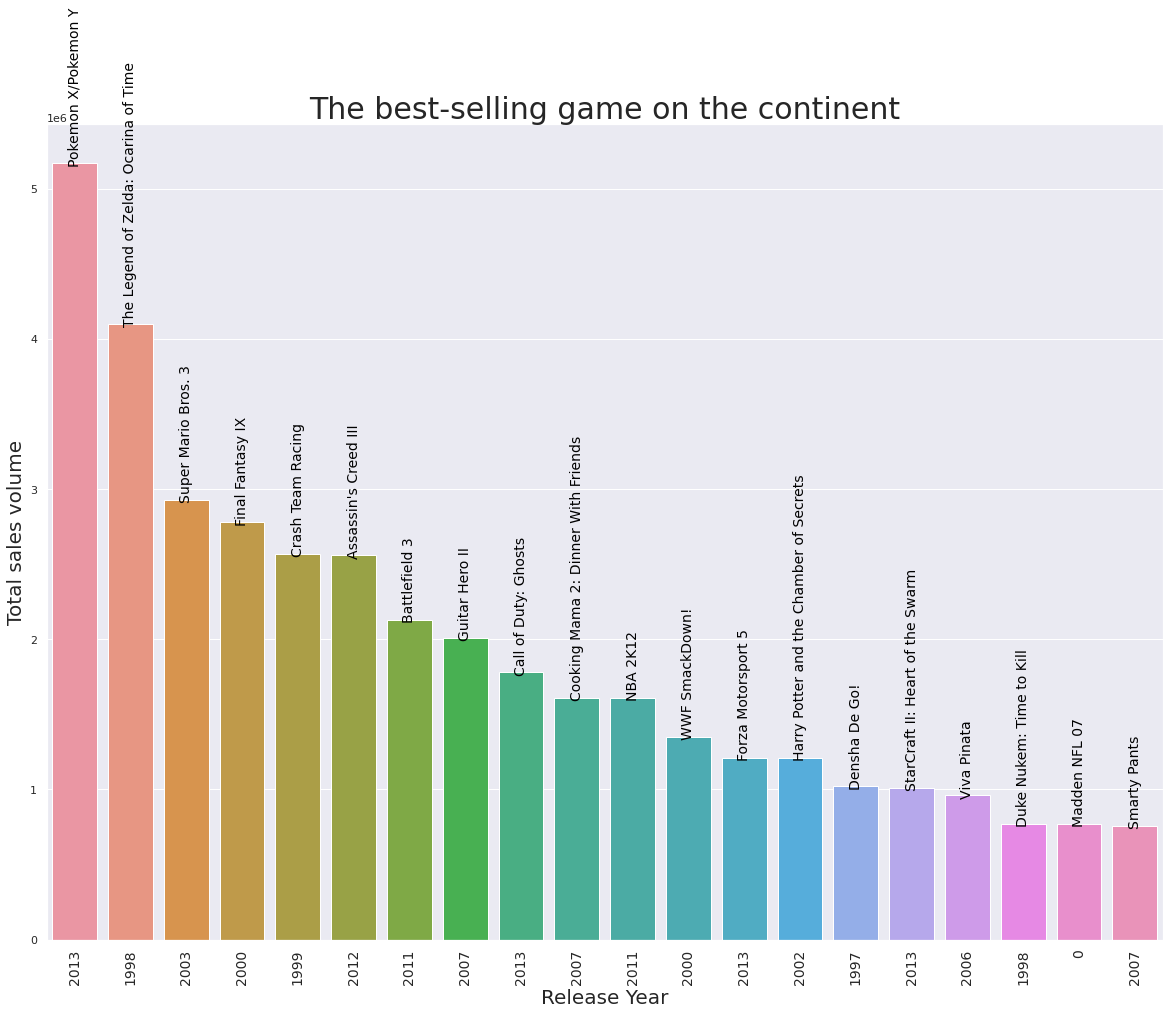

In [82]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(20, 15))
g = sns.barplot(x='Name', y='Total_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Total_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.title("The best-selling game on the continent", fontsize=30)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)
plt.show()
#연도별로 게임의 전체 판매량은 상이하다. 이를 비추어 봤을때 게임의 출시는 게임의 유행할 시기를 예측하여 프로젝트를 진행시키는 것이 옳을듯 싶다.

In [83]:
# 개인과제 : 게임플랫폼의 변천사
year_sale_pf = df.groupby(by=['Year', 'Platform'])['Total_Sales'].sum().reset_index()
year_sale_2 = year_sale_pf.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_pf['Total_Sales']
year_sale_max_2 = year_sale_pf[year_sale_2].reset_index(drop=True)
year_sale_max_2.tail()

,Year,Platform,Total_Sales
35,2014,PS3,770050.20
36,2015,PS4,1080114.16
37,2016,PS4,30039.27
38,2017,PS4,0.03
39,2020,DS,0.29


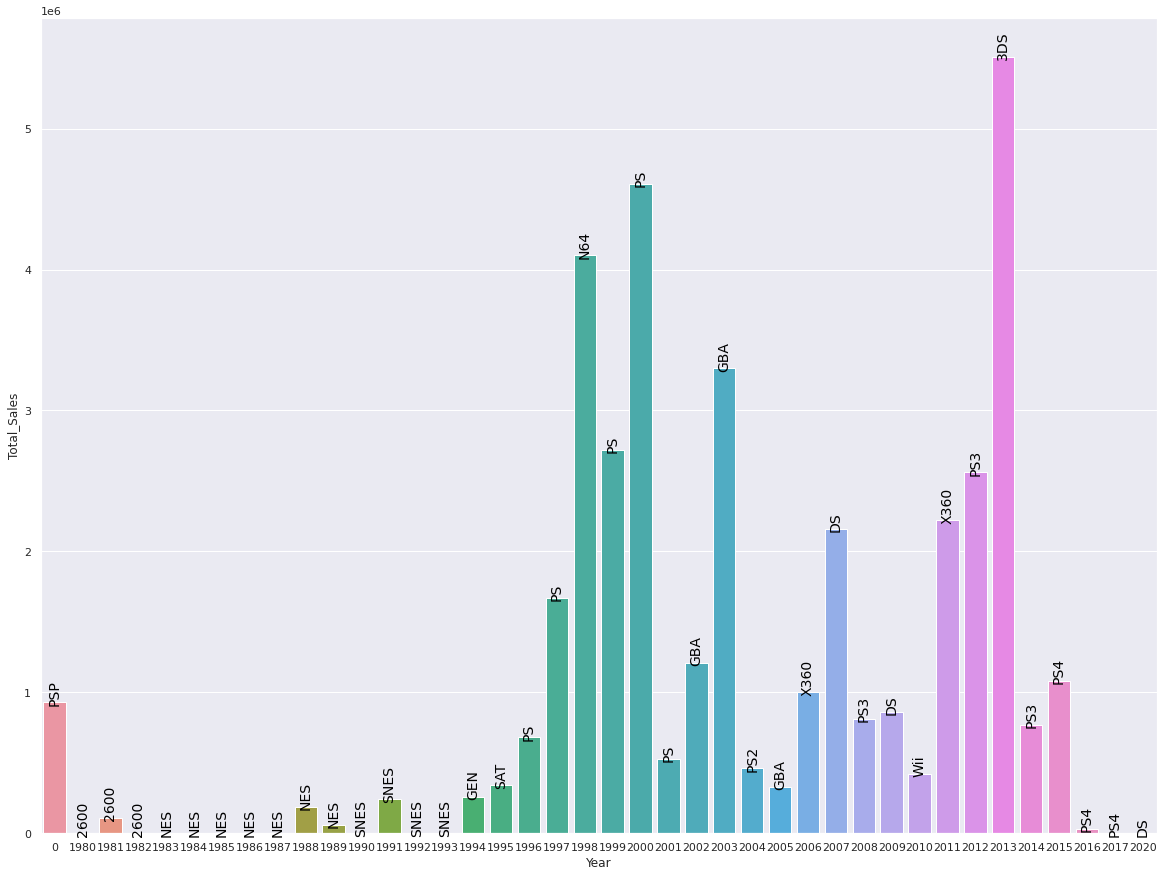

In [84]:
name = year_sale_max_2['Platform']
year = year_sale_max_2['Year']
y = np.arange(0, 40)

plt.figure(figsize=(20, 15))
g = sns.barplot(x='Year', y='Total_Sales', data=year_sale_max_2, ci = None)
index = 0
for value in year_sale_max_2['Total_Sales']:
    g.text(index, value - 38, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

#plt.xticks(y, year_sale_max_2['Year'], fontsize=14, rotation=90)
#plt.title("The best-selling game on the continent", fontsize=30)
#plt.xlabel("Release Year", fontsize=20)
#plt.ylabel("Total sales volume", fontsize=20)
plt.show()
# PS4의 인기를 실감할 수 있으며, PS 시리즈는 언제부터 경쟁력이 있었는가에 대한 궁금증이 생겼고,
# PS4 플랫폼에서 어느 게임이 가장 많이 팔렸는지 알아볼 필요가 있을꺼 같다.

In [85]:
#df_name = df.groupby(by=['Name'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 장르
#df_name = df_name.reset_index()
#df_name

sortdf_2 = df.sort_values(by=['Total_Sales'], ascending=False)
platform_game_sale = sortdf_2
platform_game_sale = platform_game_sale[['Name', 'Year', 'Platform', 'Total_Sales']]
platform_game_sale = platform_game_sale.sort_values(by=['Total_Sales'], ascending=False)
platform_game_sale = platform_game_sale.reset_index(drop=True)
#platform_game_sale
pf_game_pf = platform_game_sale.groupby(by=['Name', 'Platform'])['Total_Sales'].sum().reset_index()
platform_game_sale_2 = pf_game_pf.groupby(by=['Platform'])['Total_Sales'].transform(max) == pf_game_pf['Total_Sales']
platform_game_sale_max_2 = pf_game_pf[platform_game_sale_2].reset_index(drop=True)
platform_game_sale_max_2

,Name,Platform,Total_Sales
0,Assassin's Creed III,PS3,2560003.94
1,Battalion Wars,GC,70000.33
2,Battlefield 3,X360,2130005.21
3,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,0.03
4,Call of Duty: Ghosts,PS4,1780001.85
5,Cooking Mama 2: Dinner With Friends,DS,1610001.99
6,Doukyuusei,TG16,0.14
7,Final Fantasy,WS,0.51
8,Final Fantasy IX,PS,2780002.53
9,Forza Motorsport 5,XOne,1210000.96


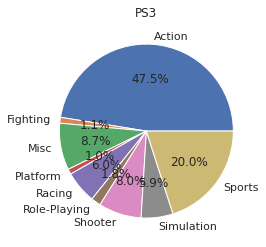

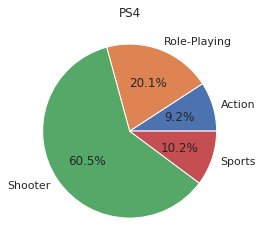

In [89]:
from sklearn.preprocessing import MinMaxScaler

final_sales = sortdf_2
final_PS_sales = final_sales['Platform'].str.contains("PS3|PS4")
aaa = final_sales[final_PS_sales]
aaa = aaa.loc[:, ['Name','Platform','Year','Genre','Total_Sales']]
aaa = aaa.head(29)
aaa_df = aaa['Platform'].str.contains('PS3')
df_ps3 = aaa[aaa_df]
df_ps3 = df_ps3.groupby(by=['Platform', 'Genre'])['Total_Sales'].sum().reset_index()
dff_ps3 = df_ps3.groupby(by=['Genre'])['Total_Sales'].transform(max) == df_ps3['Total_Sales']
df_ps3 = df_ps3[dff_ps3].reset_index(drop=True)
#df_nomal_ps3 = np.array(df_ps3['Total_Sales'])

#scaler = MinMaxScaler()

#scaler = scaler.fit_transform(df_ps3['Total_Sales'])
#df_ps3

bbb_df = aaa['Platform'].str.contains('PS4')
df_ps4 = aaa[bbb_df]
df_ps4 = df_ps4.groupby(by=['Platform', 'Genre'])['Total_Sales'].sum().reset_index()
dff_ps4 = df_ps4.groupby(by=['Genre'])['Total_Sales'].transform(max) == df_ps4['Total_Sales']
df_ps4 = df_ps4[dff_ps4].reset_index(drop=True)

plt.pie(df_ps3['Total_Sales'], labels=df_ps3['Genre'], autopct='%.1f%%')
plt.title('PS3')
plt.show()
plt.pie(df_ps4['Total_Sales'], labels=df_ps4['Genre'], autopct='%.1f%%')
plt.title('PS4')
plt.show()
#aaa_genre = aaa.groupby(by=['Genre'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 장르
#aaa_genre = aaa_genre.reset_index()
#aaa_genre

## PS 시리즈에서 역대로 잘팔린 장르는 액션과 슈터, 롤플레잉 이다.
## 앞으로 시장에 선호도가 바뀔수 있음을 고려해보자

In [88]:
# 개인 과제 T- test

from scipy import stats
pv_ps3 = df_ps3[df_ps3['Platform'] == 'PS3']
pv_ps3 = pv_ps3[['Total_Sales']]
#print(pv_ps3.head())
pv_ps4 = df_ps4[df_ps4['Platform'] == 'PS4']
pv_ps4 = pv_ps4[['Total_Sales']]
#print(pv_ps4.head())

t, p = stats.ttest_ind(pv_ps3,pv_ps4)
print("t = "+ str(t))
print("p = "+ str(p))

ValueError: ignored